In [1]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow.keras.models as models

# https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3( input_shape = ( 150, 150, 3),
                                include_top = False,
                                weights = None)


pre_trained_model.load_weights(local_weights_file)

In [3]:
# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [4]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [5]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)


last_output = last_layer.output
print(last_output)

last layer output shape:  (None, 7, 7, 768)
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [6]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)


x = layers.Dense(1 , activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)
model.compile(optimizer = RMSprop(lr=0.0001),
                loss = 'binary_crossentropy',
                metrics = ['acc'])
                

c:\Users\viren\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                      rotation_range = 40,
                                        width_shift_range = 0.2,
                                        height_shift_range = 0.2,
                                        shear_range = 0.2,
                                        zoom_range = 0.2,
                                        horizontal_flip = True,
                                        fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)


In [8]:
train_dir = '../../gender_classification/Training'
train_generator = train_datagen.flow_from_directory( 
        train_dir,
        target_size = (150, 150),
        batch_size = 1024,
        class_mode = 'binary')

validation_dir = '../../gender_classification/Validation'
validation_generator = test_datagen.flow_from_directory(

        validation_dir,
        target_size = (150, 150),
        batch_size = 1024,
        class_mode = 'binary')

history = model.fit(
            train_generator,
            validation_data = validation_generator,
        #     steps_per_epoch = 100,
            epochs = 10,
            validation_steps = 50,
            verbose = 1)





Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.
Epoch 1/10
46/46 [==============================] - 625s 14s/step - loss: 0.6062 - acc: 0.7658 - val_loss: 0.3360 - val_acc: 0.8517
Epoch 2/10
46/46 [==============================] - 543s 12s/step - loss: 0.3544 - acc: 0.8490
Epoch 3/10
46/46 [==============================] - 149s 3s/step - loss: 0.3076 - acc: 0.8703
Epoch 4/10
46/46 [==============================] - 1279s 28s/step - loss: 0.2755 - acc: 0.8848
Epoch 5/10
46/46 [==============================] - 917s 20s/step - loss: 0.2622 - acc: 0.8917
Epoch 6/10
46/46 [==============================] - 176s 4s/step - loss: 0.2417 - acc: 0.9023
Epoch 7/10
46/46 [==============================] - 170s 4s/step - loss: 0.2278 - acc: 0.9096
Epoch 8/10
46/46 [==============================] - 175s 4s/step - loss: 0.2262 - acc: 0.9112
Epoch 9/10
46/46 [==============================] - 513s 11s/step - loss: 0.2177 - acc: 0.9157
Epoch 10/10
46/46 [======

In [22]:
# model.predict(validation_generator)


model.save('newic.h5')

#predict the validation accuracy of the model
model.evaluate(validation_generator)[1]*100



12/12 [==============================] - 6s 487ms/step - loss: 0.1399 - acc: 0.9445


94.45446133613586

<Figure size 432x288 with 0 Axes>

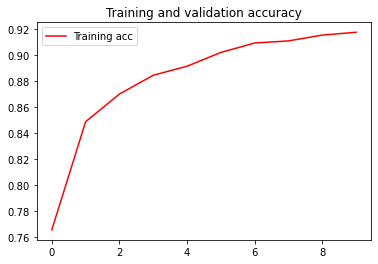

<Figure size 432x288 with 0 Axes>

In [14]:
#plot
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


<Figure size 432x288 with 0 Axes>

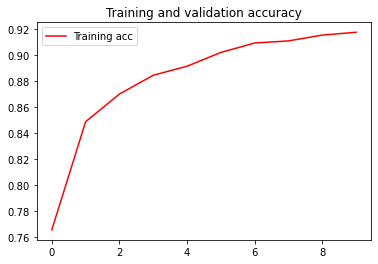

<Figure size 432x288 with 0 Axes>

In [15]:
#plot
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

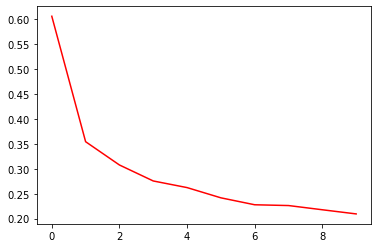

In [12]:
#plot validation and training loss
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
